<a href="https://colab.research.google.com/github/mbarragan744/clase-IA/blob/main/corte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color="red">KNN

TAMBIEN LLAMADA MODELO LAZY, porque como tal no es un modelo sino un calculo de distancias

Algoritmo de clasificacion supervisada que se basa en la distancia entre los puntos (vecinos cercanos)

Memoriza el conjunto de entrenamiento completo y realiza predicciones basandose en una comparacion directa de la proximidad entre los puntos de prueba y los puntos de entrenamiento.

Distancias que se pueden usar:
1. Euclidiana (mas común)
2. Manhattan
3. Minkowski

#<font color="red">Ventajas y Desventajas

**Ventajas:**

* Simplicidad: Es fácil de entender e implementar.

* No paramétrico: No requiere suposiciones sobre la distribución de los datos, lo que lo hace adecuado para problemas donde no se conocen las distribuciones.

* Eficaz para problemas de clasificación pequeños o moderados: Funciona bien cuando hay un conjunto de datos pequeño y bien distribuido.

**Desventajas:**

* Alto costo computacional: A medida que crece el tamaño del conjunto de datos, el tiempo de predicción aumenta, ya que debe calcularse la distancia entre el punto de prueba y todos los puntos de entrenamiento.

* Dependencia de la elección de K: El rendimiento del modelo depende de la elección de "K" (el número de vecinos). Un valor muy bajo puede resultar en sobreajuste, mientras que un valor muy alto puede llevar a un modelo subajustado.

* Sensibilidad a los valores atípicos: Los valores atípicos pueden afectar negativamente las predicciones si no se manejan adecuadamente.



<font color="red">Es obligatorio normalizar los datos, manejo de outlier, manejo de codificacion

k->numero de features

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


##<font color="red">CLASIFICACION DE KNN

PASOS A SEGUIR:



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear el conjunto de datos
data = {
    "Horas de Estudio": [
        "Alta", "Baja", "Baja", "Alta", "Alta",
        "Media", "Media", "Alta", "Baja", "Media",
        "Alta", "Baja", "Baja", "Media", "Alta",
        "Media", "Alta", "Baja", "Media", "Baja"
    ],
    "Asistencia": [
        "Buena", "Buena", "Mala", "Mala", "Buena",
        "Buena", "Mala", "Buena", "Mala", "Buena",
        "Mala", "Buena", "Mala", "Buena", "Buena",
        "Mala", "Mala", "Buena", "Buena", "Mala"
    ],
    "Resultado": [
        "Sí", "No", "No", "Sí", "Sí",
        "No", "Sí", "Sí", "No", "Sí",
        "No", "No", "Sí", "No", "Sí",
        "No", "Sí", "No", "Sí", "No"
    ]
}


df = pd.DataFrame(data)

df

,Horas de Estudio,Asistencia,Resultado
0,Alta,Buena,Sí
1,Baja,Buena,No
2,Baja,Mala,No
3,Alta,Mala,Sí
4,Alta,Buena,Sí
5,Media,Buena,No
6,Media,Mala,Sí
7,Alta,Buena,Sí
8,Baja,Mala,No
9,Media,Buena,Sí


In [ ]:
# Codificar variables categóricas a numéricas, cuando es binarios se puede utilizar cualquiera de encoder
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]

X

,Horas de Estudio,Asistencia
0,0,0
1,1,0
2,1,1
3,0,1
4,0,0
5,2,0
6,2,1
7,0,0
8,1,1
9,2,0


In [ ]:
# Ver la equivalencia de las categorías originales a los valores numéricos
print("\nEquivalencia de categorías originales:")
for column in df.columns:
    print(f"{column}: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")


Equivalencia de categorías originales:
Horas de Estudio: {'No': 0, 'Sí': 1}
Asistencia: {'No': 0, 'Sí': 1}
Resultado: {'No': 0, 'Sí': 1}


stratify=y  extraer los datos de manera aleatoria igual que la etiqueta

In [ ]:
# Dividir en conjunto de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_test

,Horas de Estudio,Asistencia
13,2,0
8,1,1
4,0,0
12,1,1


In [ ]:
X_train

,Horas de Estudio,Asistencia
19,1,1
11,1,0
0,0,0
7,0,0
3,0,1
6,2,1
16,0,1
1,1,0
17,1,0
18,2,0


<font color="red">Cuando toca hacer varios modelos, lo mejor es usar gridsearch

In [ ]:
# Entrenar el modelo KNN con K=3      hacer por lo menos 20 modelos
#Este valor de K fue arbitrario por el ejercicio
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0])

In [ ]:
y_test.to_numpy()

array([0, 0, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


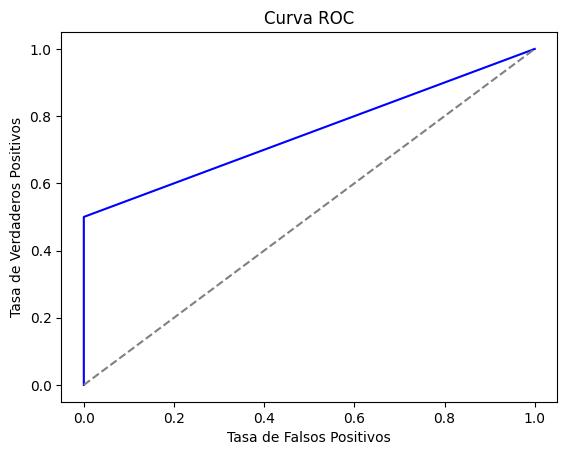

Precisión del modelo: 0.75
Matriz de confusión:
 [[2 0]
 [1 1]]
Área bajo la curva ROC: 0.75


In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Manejar el cálculo de ROC AUC solo si ambas clases están presentes
if len(set(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.show()
else:
    roc_auc = None
    print("Advertencia: El cálculo del AUC no es posible porque solo hay una clase en el conjunto de prueba.")

# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
if roc_auc is not None:
    print("Área bajo la curva ROC:", roc_auc)

lo mejor seria que fuera asintotica a la tasa de verdaderos positivos y poco a la tasa de falsos positivos


si es lineal, practicamente seria 50/50, si es por debajo de esa linea no predice nada

entre mayor area bajo la curva, es mejor

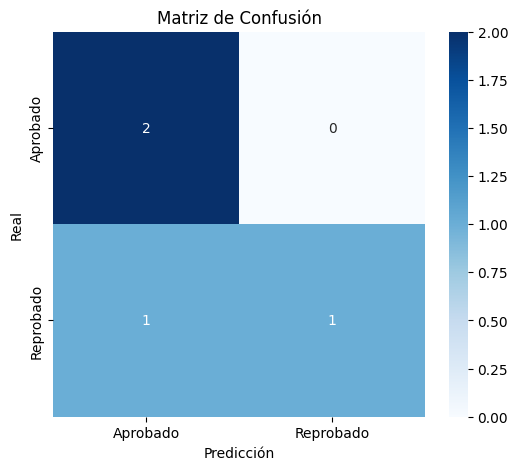

In [ ]:
import seaborn as sns
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprobado", "Reprobado"], yticklabels=["Aprobado", "Reprobado"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

#<font color="red"> CLASE 2
arboles de decision

##<font color="green">NINGUN PROYECTO DEBE HACERSE CON ARBOLES DE DECISIONES
sin embargo, se puede utilizar ramdom forest, Extreme Gradient Boosting (XGBoost) es el mejor de todos

no esta bien que el arbol sea muy extenso, porque puede ser que esta sobreentrenado, su esta muy largo, se hace pruning (podar)

un nodo impuro es cuando tiene mas de una clase, es decir, si hay las opciones de si y no, es un nodo impuro, si fuera solamente si o solamente no, seria un nodo puro, un nodo puro recibe de nombre de nodo terminal o nodo leat.

Los árboles de decisión pueden mejorar su desempeño mediante métodos como Random Forest y Gradient Boosting, estos combinan múltiples árboles para reducir el sobreajuste (overfitting) y mejorar la generalización del modelo, llamados modelos ensamblados.

algoritmos de caja blanca y algoritmos de caja negra: arboles de decisión

los arboles de decision no son lineales


* un arbol de decision clasifica una obaservacion siguiendo una serie de divisiones binarias basadas en las caracteristicas de la muestra. el arbol comienza en un nodo raiz, donde se evaluan las caracteristicas de los datos. a partir de ahi, las obaservaciones se dividen en diferentes ramas segun las condiciones especificas establecidas para cada caracteristica. este proceso continua hasta llefar a un nodo terminal, que es el que asigna una clase a la observacion.

#metodos para selecionar las divisiones:

* **gini impurity:** mide la impureza de un nodo. cuanto menor sea la impureza, mas homogenea sera la clase de ese nodo.
* **entropía (cruzada de shannon):** mide la cantidad de desorden o incertidumbre en una division. la idea es reducir la entropia de un conjunto de datos mediante la division en nodos mas homogeneos.
* logaritmo de la perdida
* **indice de gini vs entropía:** ambos criterios se utilizan para elegir el mejor punto de corte, aunque el indice de gini es mas popular debido a su simplicidad y rapidez computacional. sin embargo, la entropia tiende a ser mas informativa en divisiones con muchas clases.


### <font color="blue">11.2.2 Ventajas de los árboles de decisión para clasificación
* Interpretabilidad: Los árboles de decisión son modelos muy fáciles de interpretar y visualizar. Cada nodo y rama representan una regla de decisión que puede explicarse fácilmente.
* No requieren normalización de los datos: A diferencia de otros modelos como las máquinas de soporte vectorial (SVM) o las regresiones lineales, los árboles de decisión no requieren que los datos sean normalizados o estandarizados.
* Manejo de datos categóricos y numéricos: Los árboles pueden manejar tanto variables numéricas como categóricas sin necesidad de transformarlas (por ejemplo, a variables dummy).
* Resistencia a los valores atípicos: Los árboles no se ven muy afectados por outliers, ya que los puntos extremos no suelen influir en el valor de la división.
* Automática selección de variables importantes: Los árboles de decisión pueden identificar qué variables son más relevantes para la clasificación.

### <font color="blue">11.2.3 Desventajas de los árboles de decisión para clasificación
* Overfitting: Los árboles de decisión tienden a sobreajustarse a los datos de entrenamiento, especialmente cuando se permiten árboles muy profundos. Esto se debe a que pueden aprender detalles muy específicos que no generalizan bien a nuevos datos.
* Inestabilidad: Un pequeño cambio en los datos de entrenamiento puede llevar a una estructura de árbol completamente diferente.
* Modelo sesgado en clases desbalanceadas: Si los datos están desbalanceados, el árbol puede predecir predominantemente la clase mayoritaria.


#### <font color="blue">11.2.4 Estrategias para evitar el overfitting
Existen varias técnicas que se pueden aplicar para reducir el sobreajuste en árboles de decisión:
* Poda (Pruning): La poda elimina ramas del árbol que tienen poca importancia o que sobreajustan los datos. Se pueden usar métodos como el Cost Complexity Pruning para realizar una poda que elimine ramas que no mejoren significativamente la precisión del modelo.
* Limitación de la profundidad del árbol: Limitar la profundidad máxima del árbol es una forma sencilla de evitar que el árbol crezca demasiado, lo que podría llevar a un sobreajuste.
* Mínimo número de muestras por hoja: Establecer un número mínimo de observaciones para permitir una división en cada nodo o para que un nodo sea terminal puede ayudar a evitar divisiones demasiado específicas.
* Métodos de ensamblaje: Técnicas como Random Forest y Gradient Boosting combinan múltiples árboles de decisión para mejorar la robustez y reducir el riesgo de sobreajuste.








# EJERCICIO

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Crear el conjunto de datos
data = {
    "Horas de Estudio": ["Alta", "Baja", "Baja", "Alta", "Alta","Baja", "Alta", ],
    "Asistencia": ["Buena", "Buena", "Mala", "Mala", "Buena","Buena", "Mala",],
    "Resultado": ["Sí", "No", "No", "Sí", "Sí","No", "No",]
}

df = pd.DataFrame(data)
df

,Horas de Estudio,Asistencia,Resultado
0,Alta,Buena,Sí
1,Baja,Buena,No
2,Baja,Mala,No
3,Alta,Mala,Sí
4,Alta,Buena,Sí
5,Baja,Buena,No
6,Alta,Mala,No


In [ ]:
# Codificar variables categóricas a numéricas
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]


#Dado que son muy pocos datos no vamos a dividir en entrenamiento y pruebas, usaremos la data tanto para entrenar como para probar.

In [ ]:
print(X)
print("\n")
print(y)

   Horas de Estudio  Asistencia
0                 0           0
1                 1           0
2                 1           1
3                 0           1
4                 0           0
5                 1           0
6                 0           1


0    1
1    0
2    0
3    1
4    1
5    0
6    0
Name: Resultado, dtype: int64


In [ ]:
# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Hacer predicciones
y_pred = tree_clf.predict(X)

# Evaluación del modelo
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

In [ ]:
# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.8571428571428571
Matriz de confusión:
 [[4 0]
 [1 2]]


In [ ]:
# Verificar si hay más de una clase en y_test para calcular el ROC AUC
if len(np.unique(y)) > 1:
    roc_auc = roc_auc_score(y, tree_clf.predict_proba(X)[:, 1])
else:
    roc_auc = "No se puede calcular ROC AUC (solo una clase en y_test)"


print("Área bajo la curva ROC:", roc_auc)

Área bajo la curva ROC: 0.9583333333333333


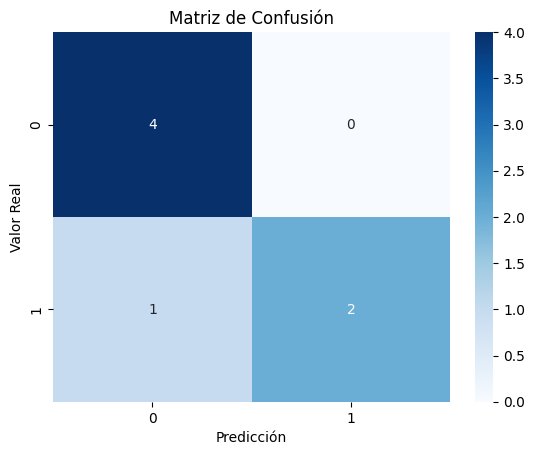

In [ ]:
#Grafique la matriz confusión en mapa de calor con seaborn
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

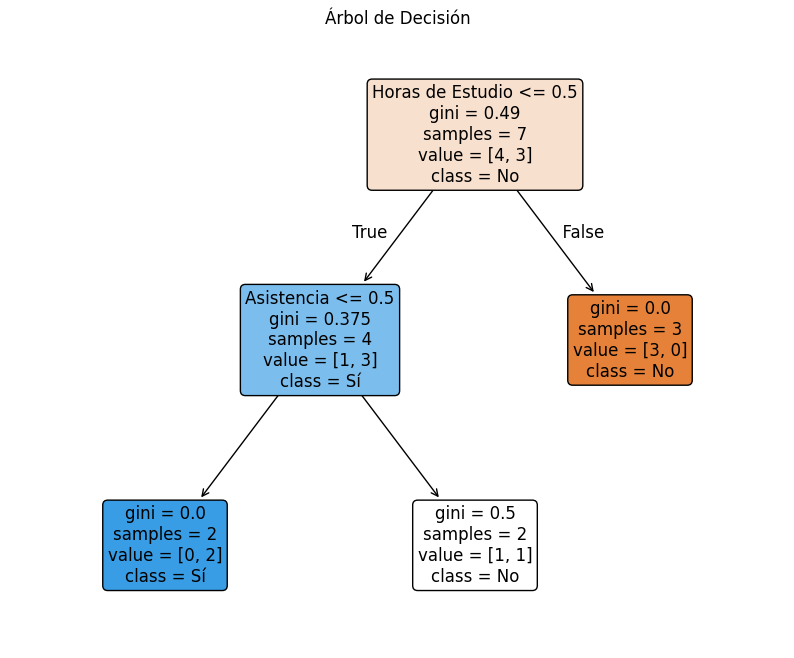

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, filled=True, feature_names=["Horas de Estudio", "Asistencia"], class_names=["No", "Sí"], rounded=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()


se selecciono las horas de estudio como el nodo raiz porque el gini fue mayor, con un criterio de division de 0.5, con 7 muestras, de los cuales 4 son ceros(pasó) y 3 son unos (no pasó).
en el false, las horas de estudio fueron mayores, entraron 3, 3 pasaron, es un nodo puro, por lo tanto ya no hay mas continuacion
en el true, entraron 4, debido a que el gini es mayor a cero, requiere que se divinan otra vez.


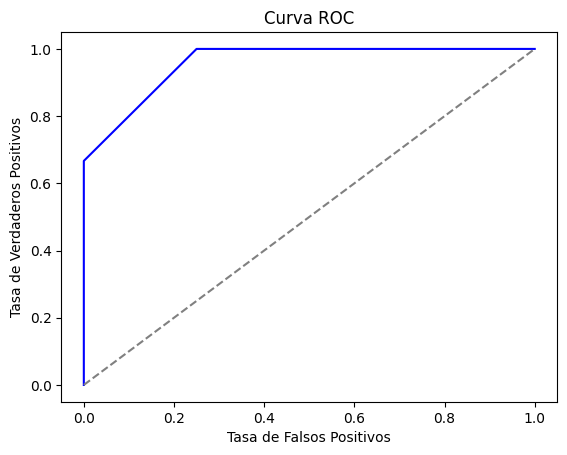

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y, tree_clf.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

In [ ]:
!pip install ELI5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 3.6 MB/s eta 0:00:00



Explicación del Árbol de Decisión (ELI5):
El árbol de decisión toma decisiones en cascada basadas en las características 'Horas de Estudio' y 'Asistencia' para predecir si un estudiante aprobará o reprobará.
La característica 'Horas de Estudio' tiene una importancia de 0.79 en la predicción.
La característica 'Asistencia' tiene una importancia de 0.21 en la predicción.

El árbol funciona de la siguiente manera:
1. Primero, se revisa la característica 'Horas de Estudio'.
2. Dependiendo del valor de 'Horas de Estudio', se avanza a una rama diferente del árbol.
3. En cada rama, se verifica la siguiente característica ('Asistencia').
4. Finalmente, se llega a una hoja del árbol, que representa la predicción (Sí o No).


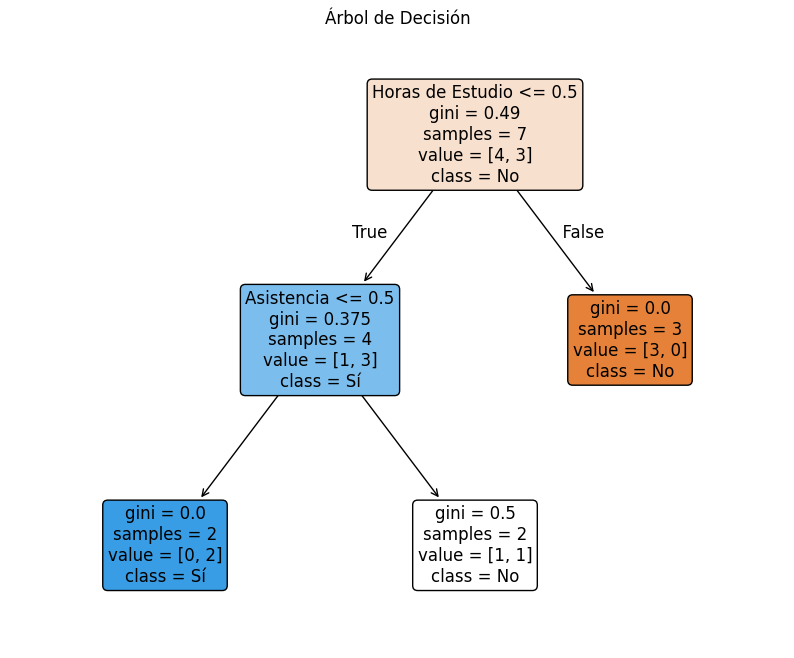

In [ ]:
# prompt: usar ELI5 para explicar el arbol entrenado

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# ... (previous code remains the same)

# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# ... (rest of the code remains the same)


# Explicación ELI5 del árbol de decisión
print("\nExplicación del Árbol de Decisión (ELI5):")
print("El árbol de decisión toma decisiones en cascada basadas en las características 'Horas de Estudio' y 'Asistencia' para predecir si un estudiante aprobará o reprobará.")

# Obtener la importancia de las características
importances = tree_clf.feature_importances_
feature_names = ["Horas de Estudio", "Asistencia"]
for i, importance in enumerate(importances):
    print(f"La característica '{feature_names[i]}' tiene una importancia de {importance:.2f} en la predicción.")

print("\nEl árbol funciona de la siguiente manera:")
print("1. Primero, se revisa la característica 'Horas de Estudio'.")
print("2. Dependiendo del valor de 'Horas de Estudio', se avanza a una rama diferente del árbol.")
print("3. En cada rama, se verifica la siguiente característica ('Asistencia').")
print("4. Finalmente, se llega a una hoja del árbol, que representa la predicción (Sí o No).")


# Visualizar el árbol con plot_tree para una mejor comprensión
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, filled=True, feature_names=["Horas de Estudio", "Asistencia"], class_names=["No", "Sí"], rounded=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()



#<font color="red"> CLASE 3

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Cargar el dataset
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df_patients = pd.read_csv(url)

df_patients

,edad,colesterol,problema_cardiaco
0,63.0,233.0,1
1,NaN,250.0,0
2,37.0,250.0,0
3,41.0,204.0,0
4,56.0,236.0,1
...,...,...,...
297,63.0,187.0,0
298,63.0,197.0,0
299,59.0,176.0,0
300,57.0,241.0,1


- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

- splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

  * If int, then consider min_samples_split as the minimum number.

  * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [ ]:
df_patients.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,300.0,54.303333,9.090661,29.0,47.00,55.0,61.00,77.0
colesterol,300.0,247.280000,51.855681,126.0,211.75,242.5,275.25,564.0
problema_cardiaco,302.0,0.493377,0.500786,0.0,0.00,0.0,1.00,1.0


los arboles de decision son inmunes a las escalas y a los outliers, pero sklearn solo permite datos numericos, no categoricos

el metodo best es el mejor criterio para partir los datos, tambien se puede el random

lo mejor para escoger el nodo raiz es ell gini o la entropia

In [ ]:
# Separar las características y la etiqueta
X = df_patients.drop(columns="problema_cardiaco")
y = df_patients["problema_cardiaco"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("División de datos completada:")
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

División de datos completada:
Entrenamiento: 241 registros
Prueba: 61 registros


test_size=0.2 es porque separa el 20%

entran 241 datos, (0= estan enfermos del corazon, 1= no estan enfermos del corazon)

In [ ]:
df_patients.problema_cardiaco.value_counts()

,count
problema_cardiaco,
0,153
1,149


In [ ]:
y_train.value_counts()


,count
problema_cardiaco,
0,122
1,119


In [ ]:
datos_train = pd.concat([X_train, y_train], axis=1)
datos_train
datos_train[datos_train.edad<= 53].count()

,0
edad,99
colesterol,98
problema_cardiaco,99


In [ ]:
datos_train[datos_train.edad<= 53].problema_cardiaco.value_counts()


,count
problema_cardiaco,
0,74
1,25


In [ ]:
df_patients.isnull().sum()

,0
edad,2
colesterol,2
problema_cardiaco,0


In [ ]:
df_patients.dropna(inplace=True)

In [ ]:
df_patients.isnull().sum()

,0
edad,0
colesterol,0
problema_cardiaco,0


In [ ]:
# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_clf.predict(X_test)

cuando lo datos estan balaceados, se usa el accuracy, cuando no lo estan se usa el area bajo la curva

In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1])

# Imprimir los resultados
print("Exactitud del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Área bajo la curva ROC:", roc_auc)

Exactitud del modelo: 0.7377049180327869
Matriz de confusión:
 [[23  8]
 [ 8 22]]
Área bajo la curva ROC: 0.7376344086021506


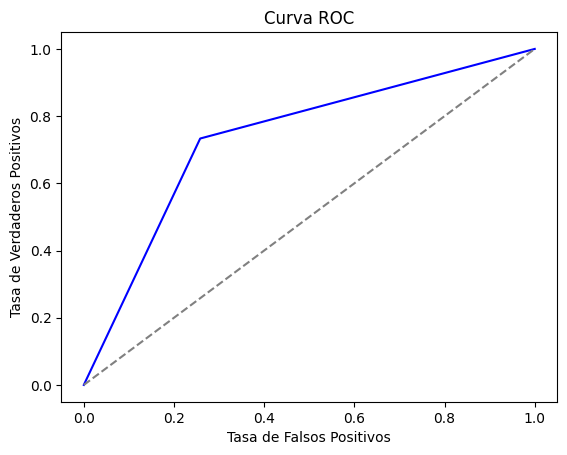

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

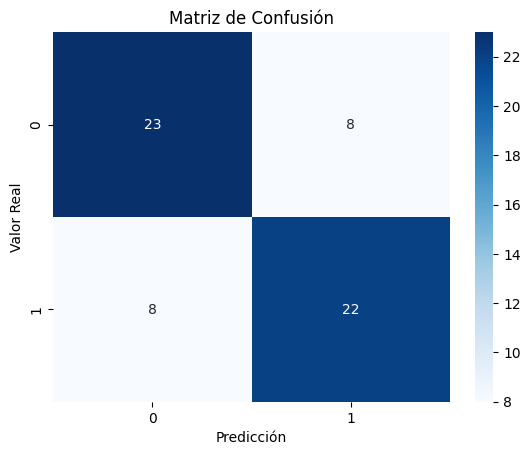

In [ ]:
#Dibujamos la matriz de confusión con seaborn con mapa de calor
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

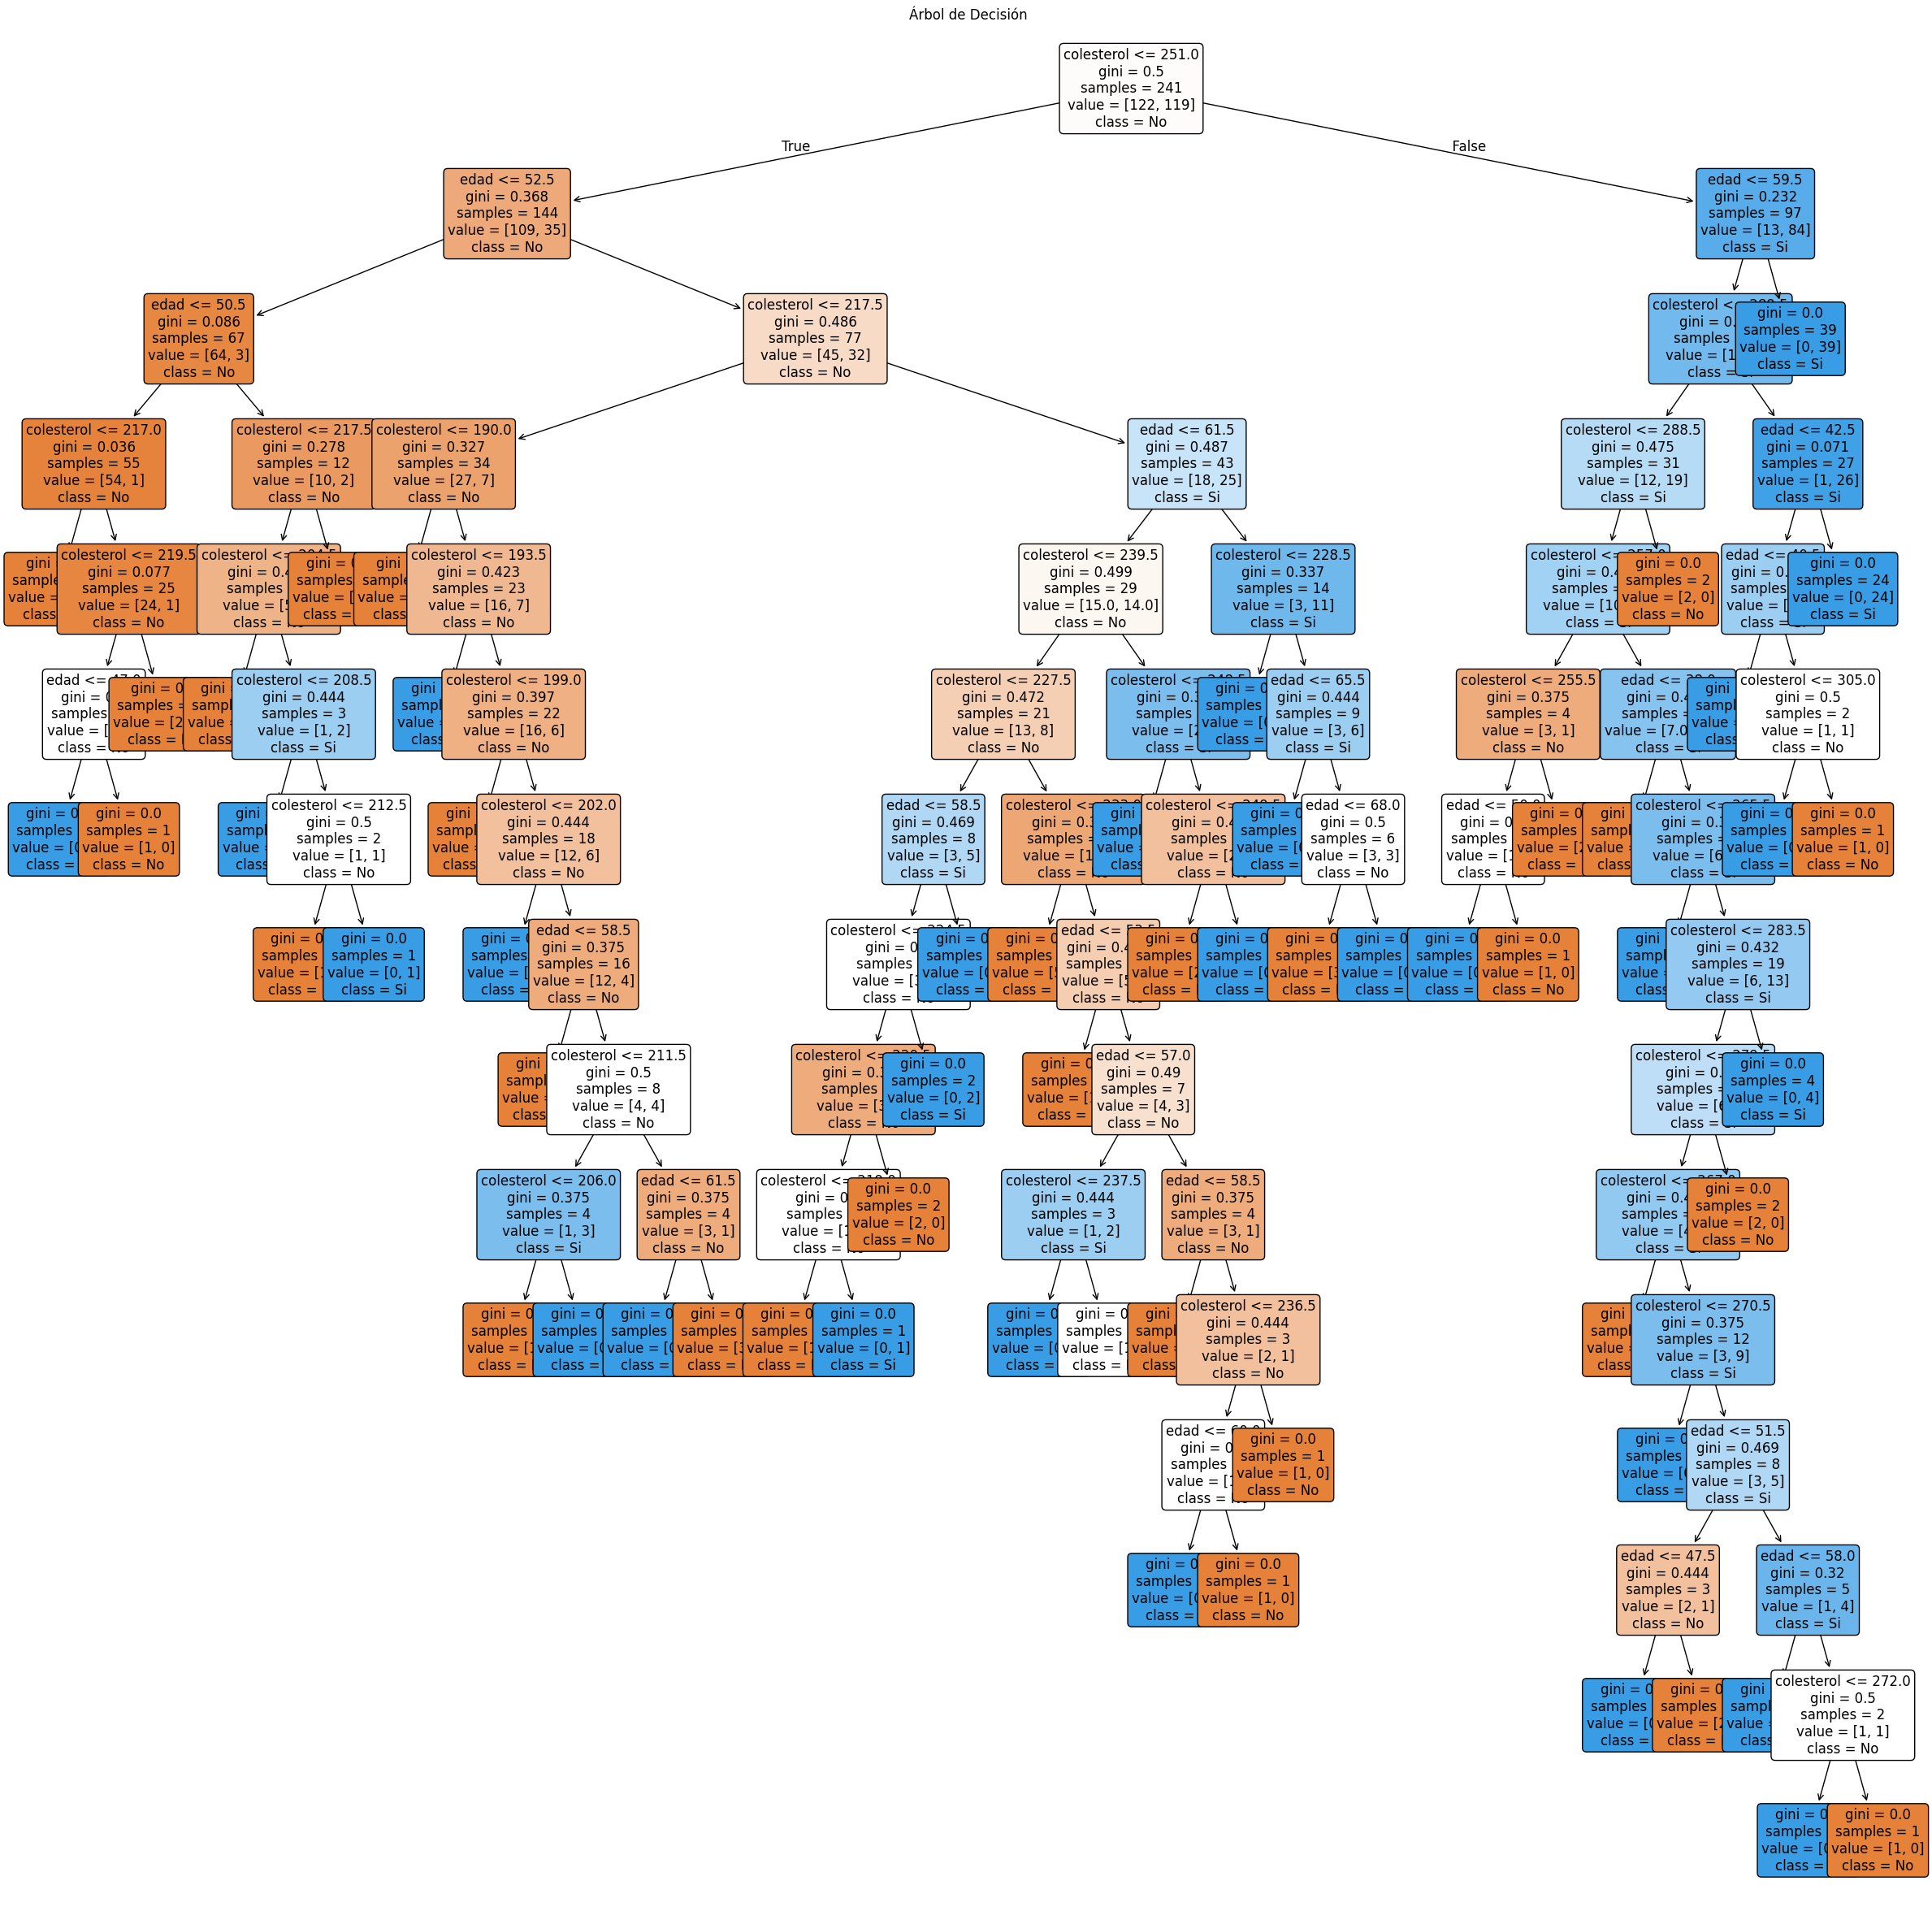

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(30, 30))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['No','Si'], rounded=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()

In [ ]:
#podar
#ahi van 1680 arboles
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(5, 14),
    'min_samples_split': [2, 3, 4,5,6,7],
    'min_samples_leaf': [1, 2,3,4,5],
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_


print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': np.int64(6), 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
y_pred = best_tree.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test.to_numpy()


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular el AUC-ROC si hay al menos dos clases
if len(np.unique(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1])
    print("Área bajo la curva ROC:", roc_auc)

Precisión: 0.8032786885245902
Matriz de Confusión:
 [[23  8]
 [ 4 26]]
Área bajo la curva ROC: 0.7376344086021506


la matriz de confusion en multiclases son aciertos y no acierto, el accuracy es los verdaderos(la diagonal) sobre el total. no hay binomial (verdadero y falso).

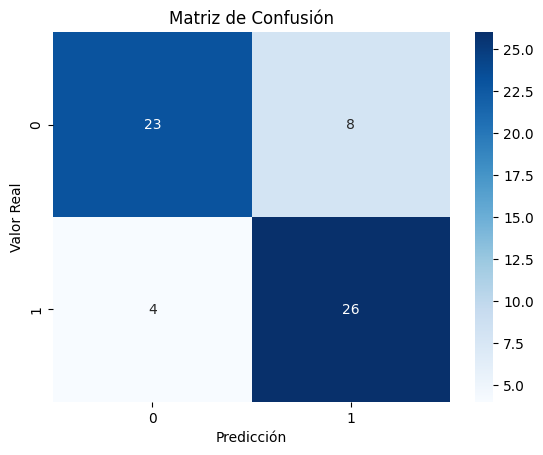

In [ ]:
#Dibujamos la matriz de confusión con seaborn con mapa de calor
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


[Text(0.5862268518518519, 0.9666666666666667, 'x[1] <= 251.0\ngini = 0.5\nsamples = 241\nvalue = [122, 119]'),
 Text(0.25578703703703703, 0.9, 'x[0] <= 52.5\ngini = 0.368\nsamples = 144\nvalue = [109, 35]'),
 Text(0.4210069444444444, 0.9333333333333333, 'True  '),
 Text(0.09259259259259259, 0.8333333333333334, 'x[0] <= 50.5\ngini = 0.086\nsamples = 67\nvalue = [64, 3]'),
 Text(0.037037037037037035, 0.7666666666666667, 'x[1] <= 217.0\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(0.018518518518518517, 0.7, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.05555555555555555, 0.7, 'x[1] <= 219.5\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.037037037037037035, 0.6333333333333333, 'x[0] <= 47.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.018518518518518517, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05555555555555555, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07407407407407407, 0.6333333333333333, 'gini

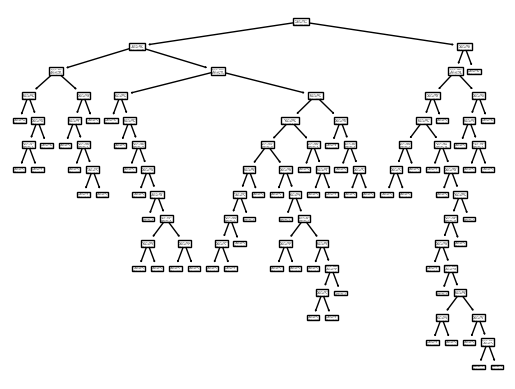

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

In [ ]:
#Realizar la predición de una persona que tiene 35 años de edad y colesterol de 220 si va a usfir de probleas cardiacos usando tree_clf
pacientes_nuevos=pd.DataFrame({'edad': [55,64,60], 'colesterol': [240,180,210]},)
pacientes_nuevos

,edad,colesterol
0,55,240
1,64,180
2,60,210


In [ ]:
estado = best_tree.predict(pacientes_nuevos)
print(estado)

[1 0 1]


In [ ]:
resultado=list(map(lambda x: 'Si' if x==1 else 'No', estado))
resultado

['Si', 'No', 'Si']

In [ ]:
#Determinemos la probabilidad de pertenecer a una clase
probabilidad = best_tree.predict_proba(pacientes_nuevos)
probabilidad

array([[0.2       , 0.8       ],
       [1.        , 0.        ],
       [0.17567568, 0.82432432]])

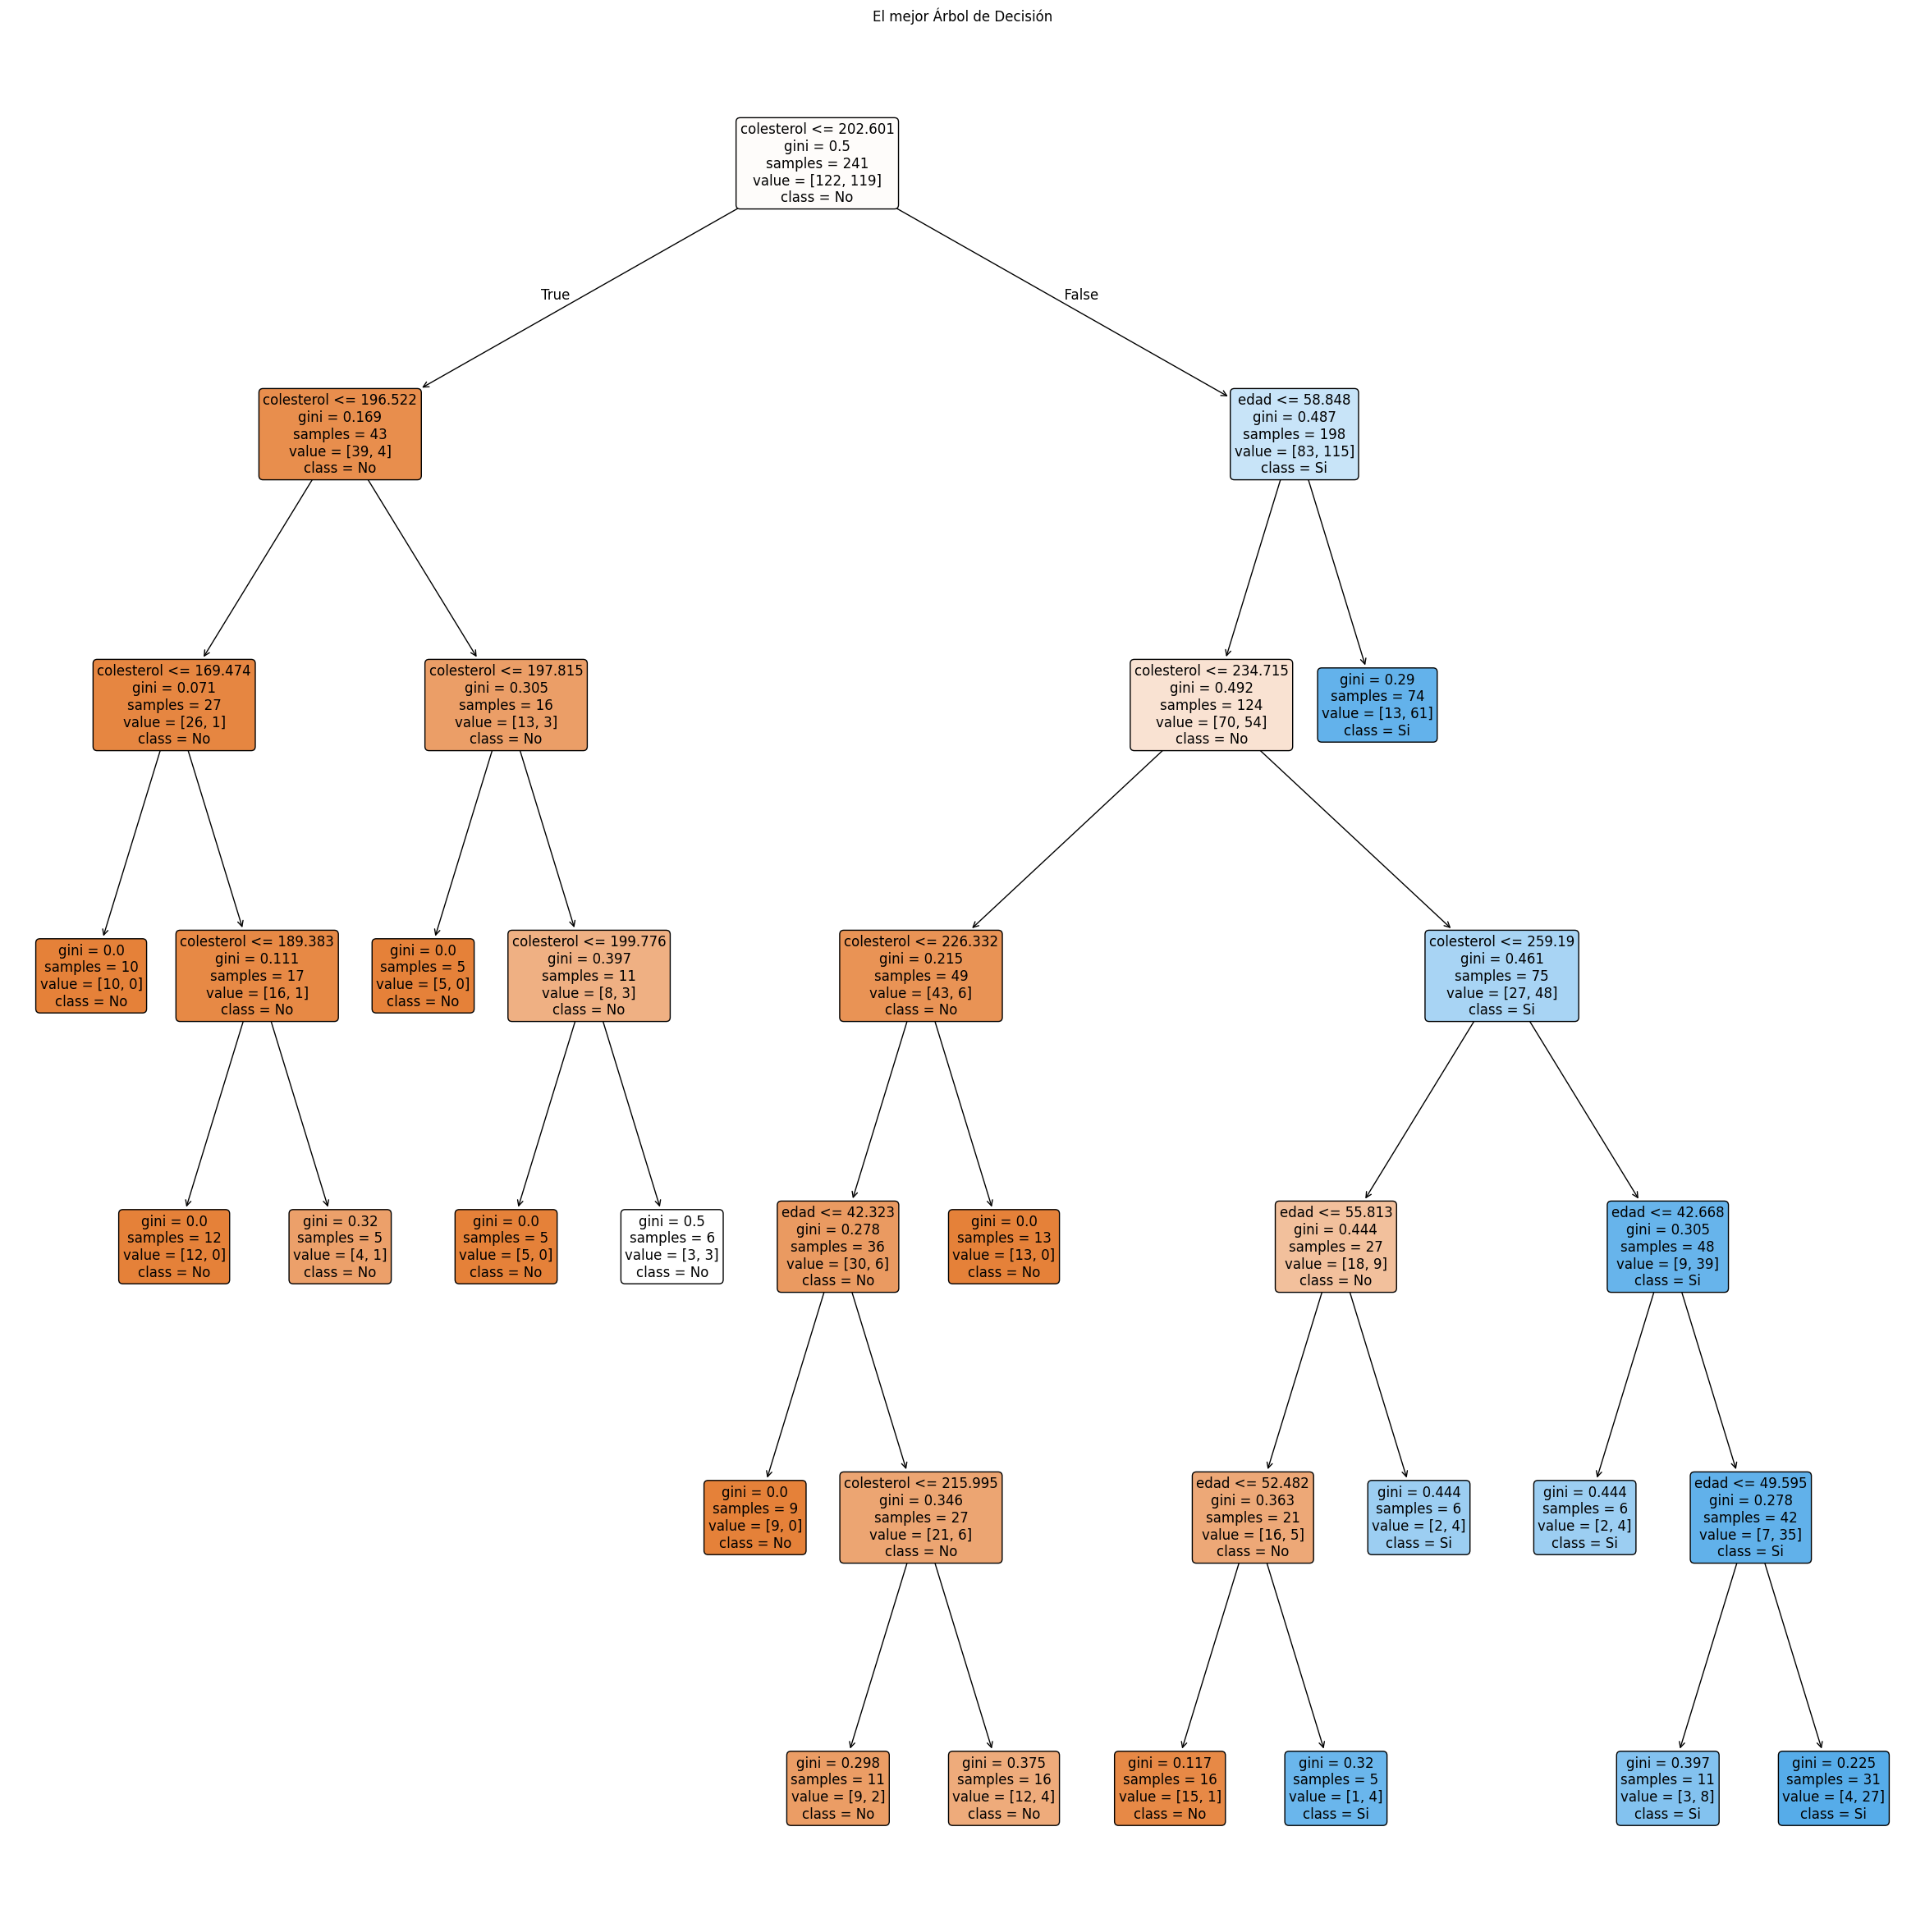

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(30, 30))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['No','Si'], rounded=True, fontsize=12)
plt.title("El mejor Árbol de Decisión")
plt.show()

#<font color="red"> CLASE 4

#CROSS VALIDATION

No es un modelo predictivo, es una tecnica para definir la calidad de los parametros de los modelos.

![image.png](https://bookdown.org/f_izco/BDC-POC/imagenes/matriz.confusion.nuestra.png)



![image.png](https://media.datacamp.com/legacy/v1701364260/image_d6ced554a1.png)

In [ ]:
import numpy as np
import pandas as pd
pd.DataFrame(np.arange(12).reshape((6, 2)),columns=['f1','f2'])

,f1,f2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11


In [ ]:

from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, train_test_split
import numpy as np

X = pd.DataFrame(np.arange(12).reshape((6, 2)),columns=['f1','f2'])
y = pd.DataFrame(np.array([0, 0, 0, 1, 1,1]), columns=['target'])

print("Features")
print(X)
print("\n Label")
print(y)

print("\n KFold")
kf = KFold(n_splits=3)
print("\n Lista por indices")
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:", test_index)

print("\n Lista valores del label")
for train_index, test_index in kf.split(X):
    # Use .iloc para selecciona las columnas
    print("Validation: \n", y.iloc[test_index,0])


Features
   f1  f2
0   0   1
1   2   3
2   4   5
3   6   7
4   8   9
5  10  11

 Label
   target
0       0
1       0
2       0
3       1
4       1
5       1

 KFold

 Lista por indices
Train: [2 3 4 5] Validation: [0 1]
Train: [0 1 4 5] Validation: [2 3]
Train: [0 1 2 3] Validation: [4 5]

 Lista valores del label
Validation: 
 0    0
1    0
Name: target, dtype: int64
Validation: 
 2    0
3    1
Name: target, dtype: int64
Validation: 
 4    1
5    1
Name: target, dtype: int64


el Kfold no garantiza que haya balaceo de datos, para eso se utiliza stratified

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold

# Datos simples (5 muestras, 2 características cada una)
X = np.array([[i] for i in range(10)])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Balanceado: 5 ceros y 5 unos

print("Datos originales:")
print("X:", X)
print("y:", y)

print("\n ✅ KFold (no considera las etiquetas):")
print("----------------------------------------")
n=0
kf = KFold(n_splits=3, shuffle=False)
for train_idx, test_idx in kf.split(X):
    n += 1
    print(f"\n  🔍 Fold No.{n}")
    print("Indice de los datos que se toman")
    print("Train:", train_idx, "Validacion:", test_idx)
    print("Los valores de la etiqueta no estan balanceados")
    print("Train:", y[train_idx], "Validacion:", y[test_idx])
n=0
print("\n ✅ StratifiedKFold (mantiene proporción de clases):")
print("----------------------------------------")
skf = StratifiedKFold(n_splits=3, shuffle=False)
for train_idx, test_idx in skf.split(X, y):
    n += 1
    print(f"\n 🔍  Fold No.{n}")
    print("Indice de los datos que se toman")
    print("Train:", train_idx, "Validacion:", test_idx)
    print("Los valores de la etiqueta están balanceados")
    print("Train:", y[train_idx], "Validacion:", y[test_idx])

Datos originales:
X: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y: [0 0 0 0 0 1 1 1 1 1]

 ✅ KFold (no considera las etiquetas):
----------------------------------------

  🔍 Fold No.1
Indice de los datos que se toman
Train: [4 5 6 7 8 9] Validacion: [0 1 2 3]
Los valores de la etiqueta no estan balanceados
Train: [0 1 1 1 1 1] Validacion: [0 0 0 0]

  🔍 Fold No.2
Indice de los datos que se toman
Train: [0 1 2 3 7 8 9] Validacion: [4 5 6]
Los valores de la etiqueta no estan balanceados
Train: [0 0 0 0 1 1 1] Validacion: [0 1 1]

  🔍 Fold No.3
Indice de los datos que se toman
Train: [0 1 2 3 4 5 6] Validacion: [7 8 9]
Los valores de la etiqueta no estan balanceados
Train: [0 0 0 0 0 1 1] Validacion: [1 1 1]

 ✅ StratifiedKFold (mantiene proporción de clases):
----------------------------------------

 🔍  Fold No.1
Indice de los datos que se toman
Train: [2 3 4 7 8 9] Validacion: [0 1 5 6]
Los valores de la etiqueta están balanceados
Train: [0 0 0 1 1 1] Validacion: [0 0 1 1]

 🔍

In [ ]:
from sklearn import svm, datasets, metrics
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar el dataset
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df_patients = pd.read_csv(url)

df_patients

,edad,colesterol,problema_cardiaco
0,63.0,233.0,1
1,NaN,250.0,0
2,37.0,250.0,0
3,41.0,204.0,0
4,56.0,236.0,1
...,...,...,...
297,63.0,187.0,0
298,63.0,197.0,0
299,59.0,176.0,0
300,57.0,241.0,1


In [ ]:
df_patients.shape

(302, 3)

In [ ]:
#Quitar los valores nulos de df_patients
df_patients.dropna(inplace=True)

In [ ]:
df_patients.shape

(298, 3)

In [ ]:
# Separar las características y la etiqueta
X = df_patients.drop(columns='problema_cardiaco')
y = df_patients['problema_cardiaco']

In [ ]:
X.columns, y.name

(Index(['edad', 'colesterol'], dtype='object'), 'problema_cardiaco')

In [ ]:
#dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Crear el modelo SVM con kernel lineal
clf = svm.SVC(kernel='rbf', C=1, random_state=42)

In [ ]:
# Calcular el accuracy con validación cruzada (5-fold)
scores = cross_val_score(clf, X_train, y_train, cv=5 , scoring= "accuracy")
print("Exactitud individual en cada fold:", scores)
print("Exactitud media: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Precisión individual en cada fold: [0.83333333 0.8125     0.83333333 0.72340426 0.76595745]
Precisión media: 0.79 (+/- 0.04)


scores.std() ->desviacion estandar

In [ ]:
# Calcular F1 macro (promedio entre clases)
scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 macro en cada fold:", scores_f1)
print("Precisión media de F1 macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

F1 macro en cada fold: [0.83216783 0.81241858 0.83216783 0.72340426 0.76424989]
Precisión media de F1 macro: 0.79 (+/- 0.04)


In [ ]:
# Calcular el precision con validación cruzada (5-fold)
scores = cross_val_score(clf, X_train, y_train, cv=5 , scoring= "precision")
print("Precisión individual en cada fold:", scores)
print("Precisión media: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Precisión individual en cada fold: [0.9        0.82608696 0.85714286 0.70833333 0.8       ]
Precisión media: 0.82 (+/- 0.06)


In [ ]:
# Otra estrategia: ShuffleSplit (división aleatoria controlada)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores_shuffle = cross_val_score(clf, X_train, y_train, cv=cv)
print("Precisión con ShuffleSplit:", scores_shuffle)
print("Precisión media: %0.2f (+/- %0.2f)" % (scores_shuffle.mean(), scores_shuffle.std()))

Precisión con ShuffleSplit: [0.75       0.75       0.8125     0.77083333 0.75      ]
Precisión media: 0.77 (+/- 0.02)


In [ ]:
# Definir un generador personalizado de validación cruzada
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
scores_custom = cross_val_score(clf, X, y, cv=custom_cv)
print("Precisión con validación cruzada personalizada:", scores_custom)

Precisión con validación cruzada personalizada: [0.8590604  0.84563758]


cross_val_score  -> retorna una sola metrica

cross_validate   -> retorna mas metricas

https://scikit-learn.org/stable/modules/model_evaluation.html  

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score

In [ ]:
# Clasificador SVM
clf = svm.SVC(kernel='rbf', C=1, random_state=0)

In [ ]:
# Definir múltiples métricas como lista
scoring = ['precision_macro', 'recall_macro','f1_macro']
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)

In [ ]:
scores

{'fit_time': array([0.01071668, 0.0052011 , 0.0039196 , 0.00410366, 0.00361323]),
 'score_time': array([0.01328993, 0.00994372, 0.00905085, 0.00900769, 0.00897217]),
 'test_precision_macro': array([0.84285714, 0.81304348, 0.83597884, 0.72373188, 0.77037037]),
 'test_recall_macro': array([0.83333333, 0.8125    , 0.83130435, 0.72373188, 0.76449275]),
 'test_f1_macro': array([0.83216783, 0.81241858, 0.83216783, 0.72340426, 0.76424989])}

In [ ]:
scores['test_recall_macro']

array([0.83333333, 0.8125    , 0.83130435, 0.72373188, 0.76449275])

In [ ]:
print("Precisión Macro")
print(scores['test_precision_macro'])
print("Precisión media: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std()))

Precisión Macro
[0.84285714 0.81304348 0.83597884 0.72373188 0.77037037]
Precisión media: 0.80 (+/- 0.04)


In [ ]:
scores['test_f1_macro']

array([0.83216783, 0.81241858, 0.83216783, 0.72340426, 0.76424989])

In [ ]:
print("Claves del resultado:", sorted(scores.keys()))
print("Recall macro promedio:", scores['test_recall_macro'].mean())

Claves del resultado: ['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
Recall macro promedio: 0.7930724637681159


##<font color="red">LEER EL CUADERNO 11 DE ARBOLES DE DECISION Y PRACTICAR PORQUE EL MARTES HAY QUIZ DE ESO

#<font color="red"> CLASE 5

* modelo supervisado:

clasificacion y regresion

* no supervisado:

Clustering (agrupamiento), puntos anomalos, reduccion de dimensionalidad, modelos de mezcla y modelos generativos.



* los residuos son los errores

<font color="red">la proxima clase se va a evaluar gridsearch con bosques aleatorios

#<font color="red"> REGRESION LINEAL MULTIPLE

Es un modelo que busca encontrar una relacion lineal entre variables independientes y la variable dependiente.

#<font color="red"> BONDAD DE AJUSTE DEL MODELO

* Error estandar residual, mide la desviacion promedio entre los valores observados y los valores predichos por el modelo

* Coeficiente de determinacion (R^2), indica la proporcion de la variabilidad de la variable dependiente

* Significancia de los predictores (pivalue, cuando es bueno para predecor es menor a 0.05), se evalua la significancia de los predictores usando el valor de p de las pruebas de hipotesis si p< a (nivel de significancia, comunmente 0.05), el predictor es significativo.

#<font color="red"> VARIABLES CATEGORICAS COMO PREDICTORES

Las variables categoricas deben transformarse a variables dummy antes de usarse en regresion lineal.

#<font color="red"> VALIDACION DEL MODELO

* <font color="red"> NO COLINEALIDAD O MULTICOLINEALIDAD:

La multicolinealidad ocurre cuando los predictores de un modelo de regresion estan altamente correlacionados entre si, lo que dificulta la estimacion precisa de los coeficientes. En presencia de multicolinealidad, los resultados del modelo pueden ser inestables, y las interpretaciones de los coeficientes pueden volverse poco confiables. Es importante evaluar y detectar la multicolinealidad en modelos de regresion

Para evaluar la multicolinealidad, se utilizan dos metodos principales:

* indice de tolerancia: este indice mide cuanto de la varianza de un predictor puede explicarse por los demas predictores

donde $\text R_j^2$ es el coeficiente de determinacion de la regresion del predictor j sobre los otros predictores. un valor de tolerancia cercano a 0 indicca alta multicolinealidad


* factor de inflacion de la varianza: el VIF mide cuanta varianza en el coeficiente estimado de un predictor se 'infla' debido a la correlacion con otros predictores

donde $\text R_j^2$ es el coeficiente de determinacion de la regresion del predictor (j) sobre los demas predictores. Un VIF alto (tipicamente mayor a 10) indica una alta multicolinealidad

en general:

* si la tolerancia es pequeña o el VIF es grande, signidica que hay multicolinealidad.
* se recomienda tratar de eliminar o combinar variables altamente correlacionadas para reducir la multicolinealidad y mejorar la estabilidad del modelo.


* <font color="red"> RELACION LINEAL:

la relacion entre los predictores y la variables dependiente debe ser lineal. puede medirse mediante:

- diagramas de dispersion
- transformaciones logaritmicas si es necesario


* <font color="red"> NORMALIDAD DE LOS RESIDUOS:

los residuos deben seguir una distribucion normal. Puede verificarse con:

- prueba de Shapiro-Wilk
- graficos Q-Q

* <font color="red"> HOMOCEDASTICIDAD:

Se refiere a que la variainza de los residuos debe ser constante a lo largo de los valores ajustados (predicciones). Si la varianza de los residuos cambia con los valores ajustados, se dice que heterocesasticidad. Para verificar la homocedasticidad, se puede graficar los residuos versus los valores ajustados. En una distribucion homogenea, los residuos debe estar dispersos aleatoriamente alrededor de cero, sin formar patrones sistematicos

